In [1]:
#importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.io as pio

In [4]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 14.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.9 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 5.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 5.9 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 5.9 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/9.9 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.3 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- --

In [2]:
#importing dataset

dataset=pd.read_csv('Zomato_Mumbai_Dataset.csv' ,delimiter='|')
dataset.head()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995


In [3]:
dataset.shape

(15081, 12)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [5]:
dataset.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


Cleaning Dataset

1,Removing the redundunt rows of data

In [6]:
#checking redundunt rows of data

wrong_data=dataset['PAGE NO']=='PAGE NO'
dataset[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


In [7]:
# Performing Negation of the wrong dataset and then storing the correct data back in the raw_df DataFrame 
# This permamnently remove the wrong data from the original dataframe 
 
dataset = dataset[~wrong_data]

In [8]:
#Droping column which are required for future analysis

dataset.drop(['URL', 'PAGE NO', 'CITY'], axis=1, inplace=True)

In [9]:
dataset

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Malad West,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


2. Removing the null records

In [10]:
#Checking for Null Records

dataset.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [11]:
#checking for a null row

dataset[dataset['PRICE'].isnull()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#droping the above row from the dataset
 
dataset=dataset.drop(labels=15080, axis=0)

In [13]:
#Replacing the other null records with NA

dataset.fillna('NA', inplace=True)

In [14]:
#checking null again after replace 'NA'

dataset.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

3.Converting the DataTypes of numerical columns to numeric datatype

In [15]:
#checking for textvalues in the column before converting it to numeric datatype

dataset['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
4.8           4
2.2           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [16]:
#Replacing text values in to 0

dataset['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\903188561.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)


In [17]:
# Checking for text values in the column before converting it to numeric datatype 
 
dataset['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1876       1
2797       1
799        1
3058       1
3529       1
Name: count, Length: 1123, dtype: int64

In [18]:
# Replacing the text values with '0' 
 
dataset['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\485613283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)


In [19]:
# Changing data type of the numerical column

dataset['PRICE']=dataset['PRICE'].astype('int64')
dataset['RATING']=dataset['RATING'].astype('float64')
dataset['VOTES']=dataset['VOTES'].astype('int64')

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


4, Working with 'Timing' Column

In [21]:
dataset['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                           1192
11am to 12midnight(Mon-Sun)                      632
12noon to 12midnight(Mon-Sun)                    467
11am to 1130pm(Mon-Sun)                          309
10am to 10pm(Mon-Sun)                            267
                                                ... 
12noon to 4am(Mon-Sat),9am to 4am(Sun)             1
1230pm to 11pm(Mon-Thu),1230pm to 1130pm...        1
830am to 9pm(Mon-Sat),Closed(Sun)                  1
10am to 5pm,7pm to 2am(Mon-Sun)                    1
8am to 11am,12noon to 3pm,730pm to 1130pm...       1
Name: count, Length: 2551, dtype: int64

In [22]:
#spliting the column and storing in temporary dataset
temp_data=dataset['TIMING'].str.split("(",n=1,expand=True)
temp_data

,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


In [23]:
#Assining the column back to the orginal dataset

dataset['TIMIMG']=temp_data[0]
dataset['DAYS_OPEN']=temp_data[1]
dataset

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun)
...,...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun)
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29,9am to 1230AM,Mon-Sun)


In [24]:
# Removing the bracket character from Days column 
 
dataset['DAYS_OPEN'] = dataset['DAYS_OPEN'].astype(str).str.replace(r'[()]', '', regex=True)
dataset

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995,1130am to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99,11am to 11pm,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29,9am to 1230AM,Mon-Sun


In [26]:

# Checking for Null records in DAYS_OPEN column
dataset.isnull().sum()


NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
TIMIMG             0
DAYS_OPEN          0
dtype: int64

In [27]:
# Replacing the null values with "NA"
dataset.fillna('NA', inplace=True)

In [28]:
#checking info of all columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   TIMIMG           14138 non-null  object 
 10  DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


e. Removing the restaurant records whose Rating or Votes is 0

In [30]:
 # Finding those restaurant whose has 0 Rating or Votes 
 
useless_data = (dataset['RATING'] == 0.0) | (dataset['VOTES'] == 0) 
dataset[useless_data] 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM(Mon-Sun),Not rated,0.0,0,1030am to 1230AM,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am(Mon-Sun),NA,0.0,0,11am to 3am,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am(Mon-Sun)",NA,0.0,0,"12noon to 330pm,7pm to 3am",Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM(Mon-Sun),Not rated,0.0,0,12noon to 1230AM,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am(Mon-Sun)",Not rated,0.0,0,"12noon to 4pm,8pm to 1am",Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am(Mon-Sun),NA,0.0,0,12noon to 4am,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am(Mon-Sun),NA,0.0,0,12noon to 3am,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,"10am to 10pm(Mon-Thu),10am to 11pm(Fri-Sun)",NA,0.0,0,10am to 10pm,"Mon-Thu,10am to 11pmFri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am(Mon-Sun),NA,0.0,0,12noon to 3am,Mon-Sun


In [31]:
 ## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame 
## This permamnently remove the wrong data from the original dataframe 
 
dataset = dataset[~useless_data]

f. Working on 'RATING_TYPE' Column

In [32]:
 # Checking the unique values in the column 
 
dataset['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
İyi                 2
Buono               2
Bom                 2
Muito Bom           2
Promedio            2
Dobré               2
Priemer             2
Průměr              2
Ortalama            2
Bueno               2
Excelente           1
Velmi dobré         1
Baik                1
Çok iyi             1
Skvělé              1
Média               1
Sangat Baik         1
Biasa               1
Muy Bueno           1
Media               1
Name: count, dtype: int64

In [36]:
 # Translating the texts into proper English text 
 
dataset['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True) 
dataset['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good', inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good',inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True) 
dataset['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
dataset['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True) 

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\3933640351.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\3933640351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['RATING_

In [37]:
 # Checking all the values correctly mapped 
 
dataset['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

g. Working on 'REGION' Column

In [38]:
dataset['REGION'].value_counts() 

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Little World Mall-- Kharghar           1
Le Sutra Hotel-- Khar                  1
Maxus Mall-- Bhayandar                 1
Orchard Mall-- Goregaon East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [39]:
 # Removing the irrelevant text from the Region column
 
dataset['REGION'] = dataset['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True) 

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\175008552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['REGION'] = dataset['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)


In [40]:
 # Removing the West & East from the Region column 
 
dataset['REGION'] = dataset['REGION'].str.replace(' West| west| East| east','',regex=True)

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\1805146092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['REGION'] = dataset['REGION'].str.replace(' West| west| East| east','',regex=True)


In [41]:
 dataset['REGION'].value_counts()

REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Flea Bazaar Café       3
Majiwada               3
Panvel                 2
CBD Belapur            1
Girgaon Chowpatty      1
Name: count, Length: 101, dtype: int64

In [42]:
 # Replacing Small regions with Known region name 
dataset['REGION'] = dataset['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Panvel',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
dataset['REGION'] = dataset['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Runwal Green','Mulund',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Kamothe','Sion',regex=True) 
dataset['REGION'] = dataset['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\3855054985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['REGION'] = dataset['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Panvel',regex=True)
C:\Users\PRIYANKA MANI\AppData\Local\Temp\ipykernel_2948\3855054985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['REGION'] = dataset['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
C:\Users\PRIYANKA MANI\AppData\Loc

h. Removing Duplicate records

In [43]:
# Finding all the duplicate rows 
 
dataset[dataset.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight(Mon-Sun),Good,3.7,99,11am to 12midnight,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm(Mon-Sun)",Good,3.5,181,"11am to 330pm,630pm to 1130pm",Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm(Mon-Sun),Average,3.2,8,1030am to 1130pm,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm(Mon-Sun),Good,3.5,49,11am to 11pm,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm(Mon-Sun)",Good,3.5,44,"12noon to 3pm,730pm to 1030pm",Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM(Mon-Sun),Average,2.8,97,12noon to 1230AM,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM(Mon-Sun),Good,3.5,49,11am to 1230AM,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM(Mon-Sun)",Good,3.6,76,"12noon to 3pm,7pm to 1230AM",Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM(Mon-Sun),Good,3.6,120,1pm to 1215AM,Mon-Sun


In [44]:
 # Dropping all the duplicate rows 
 
dataset = dataset.drop_duplicates()

4. Copying the cleaned data into a new DataFrame

In [45]:
zomato_df = dataset.copy()

In [48]:
zomato_df.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723,2pm to 1am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200,12noon to 130am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun


5. Performing Exploratory Data Analysis
   
Q1) How many restaurants are in Mumbai for each type of cuisine?

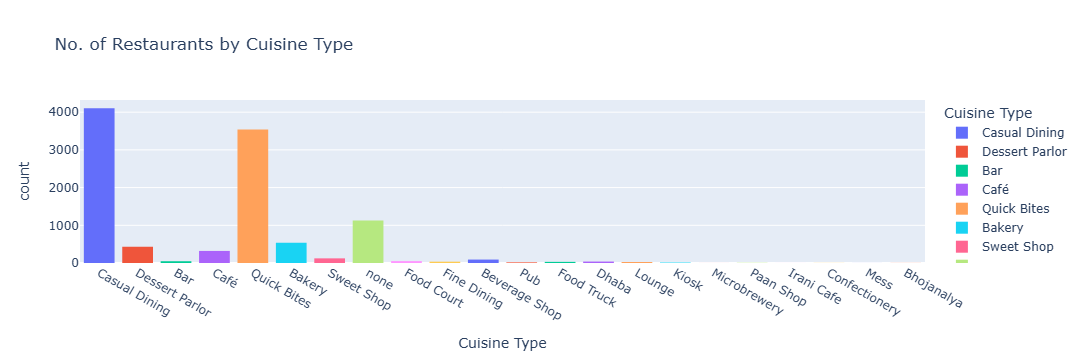

In [50]:
fig = px.histogram(zomato_df, x='CUSINE TYPE', color='CUSINE TYPE',  
             title= 'No. of Restaurants by Cuisine Type',  
             labels={'CUSINE TYPE':'Cuisine Type'}) 
 
fig.show()

Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [68]:
rating_type_df = (zomato_df['RATING_TYPE'].value_counts() .reset_index())

rating_type_df.columns = ['RATING TYPE', 'COUNT OF RESTAURANTS']

print(rating_type_df.head())

  RATING TYPE  COUNT OF RESTAURANTS
0     Average                  4983
1        Good                  4263
2   Very Good                  1145
3   Excellent                    96
4        Poor                    56


In [70]:
print(rating_type_df.columns)

Index(['RATING TYPE', 'COUNT OF RESTAURANTS'], dtype='object')


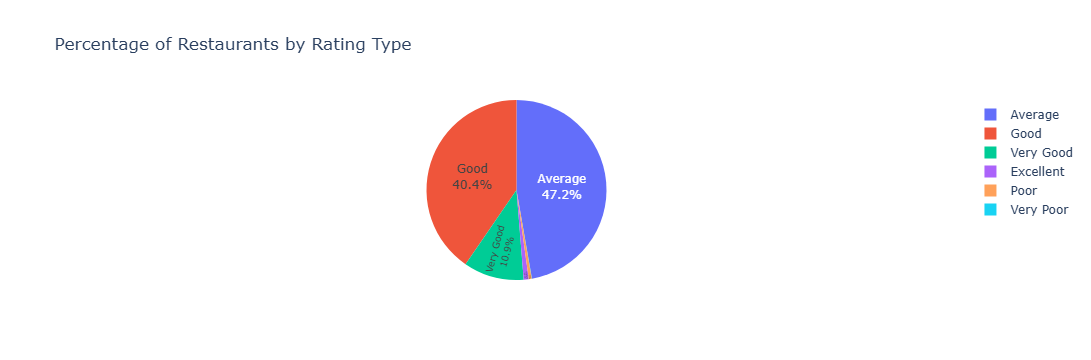

In [71]:
fig = px.pie(
    rating_type_df,
    names='RATING TYPE',
    values='COUNT OF RESTAURANTS',
    color='RATING TYPE',
    title='Percentage of Restaurants by Rating Type'
).update_traces(textposition='inside', textinfo='percent+label')

fig.show()

Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [72]:
seafood_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Seafood')] 
seafood_df.sort_values(by='RATING',ascending=False).head(10) 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am(Mon-Sun)",Excellent,4.7,564,"12noon to 4pm,7pm to 3am",Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm(Mon-Sun),Excellent,4.6,350,1130am to 1130pm,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm(Mon-Sun)",Excellent,4.6,209,"11am to 345pm,7pm to 1145pm",Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight(Mon-Sun)",Excellent,4.5,2068,"12noon to 6pm,7pm to 12midnight",Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm(Mon-Sun),Excellent,4.5,178,11am to 11pm,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am(Mon-Sun)",Excellent,4.5,573,"12noon to 330pm,7pm to 1am",Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM(Mon-Sun)",Excellent,4.5,497,"12noon to 330pm,7pm to 1230AM",Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.5,100,12noon to 1am,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm(Mon-Sun)",Very Good,4.4,662,"1130am to 330pm,6pm to 1130pm",Mon-Sun
8890,Hardeep Punjab,1100,"North Indian,Chinese,Mughlai,Seafood",Sion,Casual Dining,11am to 1am(Mon-Sun),Very Good,4.4,871,11am to 1am,Mon-Sun


Q4) Which is the best Food Truck in Mumbai?

In [73]:
foodtruck_df = zomato_df[zomato_df['CUSINE TYPE'] == 'Food Truck'] 
foodtruck_df.sort_values(by='RATING',ascending=False).head(2) 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm(Mon-Sun),Very Good,4.3,212,430pm to 930pm,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am(Mon-Sun),Very Good,4.1,274,6pm to 3am,Mon-Sun


Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [74]:
 # Assuming restaurants having rating above 4.5 
 
highest_rated_df = zomato_df[zomato_df['RATING'] >= 4.5] 
highest_rated_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.7,1842,12noon to 130am,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am(Mon-Sun),Excellent,4.7,1876,12noon to 1am,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am(Mon-Sun),Excellent,4.5,2092,12noon to 1am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm(Mon,Tue,Wed...",Excellent,4.5,1302,"11am to 330pm,7pm to 1130pm","Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,"Closed(Mon),12noon to 11pm(Tue-Sun)",Excellent,4.6,492,Closed,"Mon,12noon to 11pmTue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight(Mon-Sun),Excellent,4.8,184,11am to 12midnight,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm(Mon-Sun)",Excellent,4.5,754,"1130am to 330pm,7pm to 1130pm",Mon-Sun


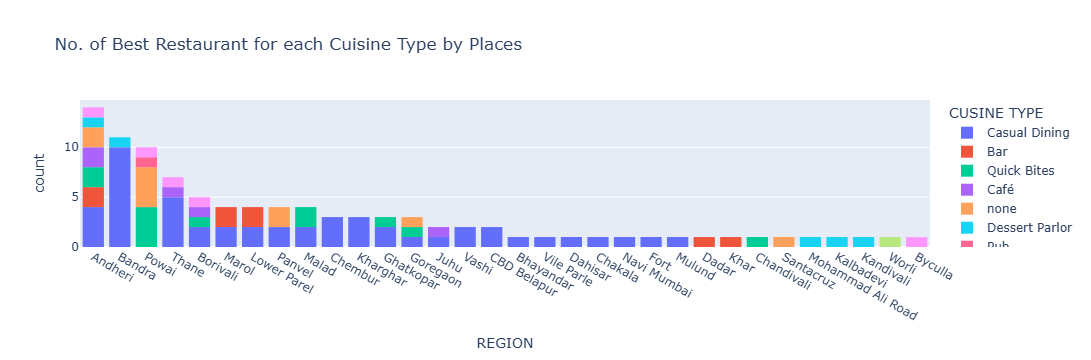

In [78]:
fig = px.histogram(highest_rated_df, x='REGION', color='CUSINE TYPE',  
             title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
 
fig.show() 

Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai

In [79]:
highest_rated_price_df = highest_rated_df.groupby(by=['REGION', 'CUSINE TYPE'])['PRICE'].mean().reset_index() 
highest_rated_price_df.head() 

,REGION,CUSINE TYPE,PRICE
0,Andheri,Bar,1600.0
1,Andheri,Café,800.0
2,Andheri,Casual Dining,1212.5
3,Andheri,Dessert Parlor,300.0
4,Andheri,Lounge,1700.0


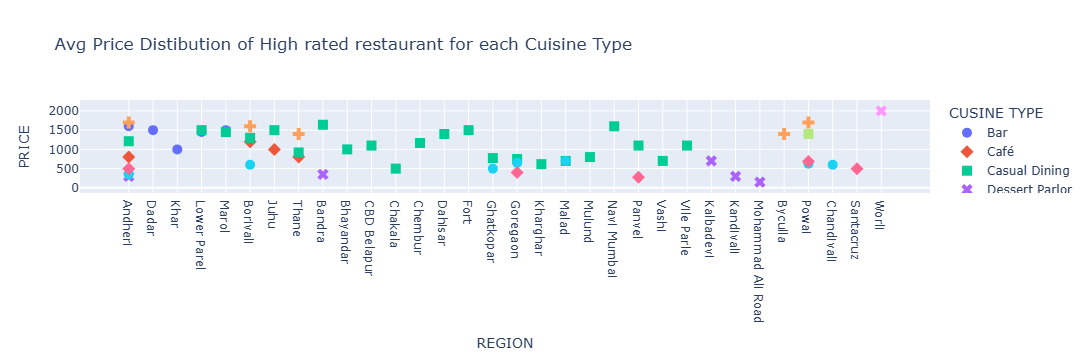

In [81]:
fig = px.scatter(highest_rated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",  
           title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
 
fig.show()

Q7) Which areas have a large number of Chinese Restaurant Market?

In [83]:
chinese_df = zomato_df[zomato_df['CUSINE_CATEGORY'].str.contains('Chinese')] 
chinese_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,TIMIMG,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529,12noon to 130am,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337,12noon to 1am,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am(Mon-Sun),Very Good,4.4,5995,1130am to 1am,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am(Mon-Sun),Very Good,4.2,2042,12noon to 1am,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am(Mon-Sun),Excellent,4.5,3058,10am to 3am,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am(Mon-Sun),Average,2.6,36,12noon to 2am,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am(Mon-Sun)",Average,3.3,13,"12noon to 4pm,730pm to 430am",Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267,"8am to 11pm,12midnight to 115am",Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64,11am to 230am,Mon-Sun


In [92]:
chinese_rest_df = chinese_df.groupby(by='REGION') \
    .agg({'NAME': 'count', 'PRICE': 'mean'}) \
    .rename(columns={'NAME': 'COUNT OF RESTAURANTS'}) \
    .sort_values('COUNT OF RESTAURANTS', ascending=False) \
    .head(25) \
    .reset_index()
chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,PRICE
0,Thane,371,590.983827
1,Panvel,262,584.351145
2,Mira Road,224,553.348214
3,Malad,186,604.032258
4,Goregaon,163,548.773006


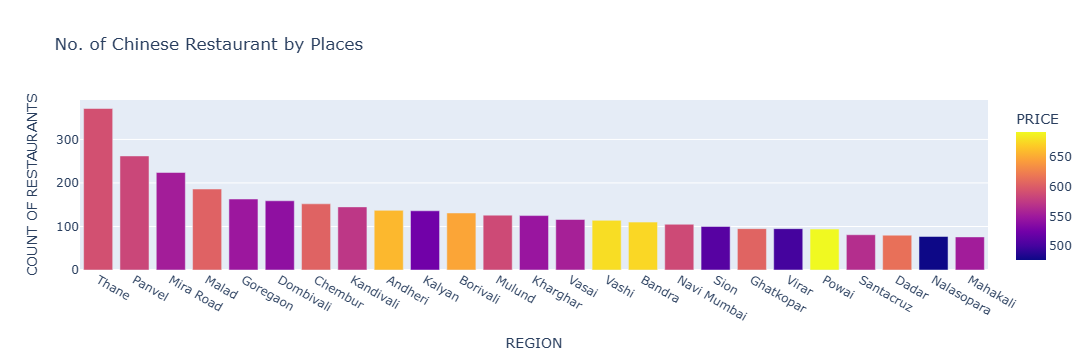

In [93]:
fig = px.bar(
    chinese_rest_df,
    x='REGION',
    y='COUNT OF RESTAURANTS',
    color='PRICE',
    title='No. of Chinese Restaurant by Places'
)

fig.show()

Q8) Is there a relation between Price and Rating by each Cuisine Type?

In [95]:
price_rating_df = zomato_df.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index() 
price_rating_df

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


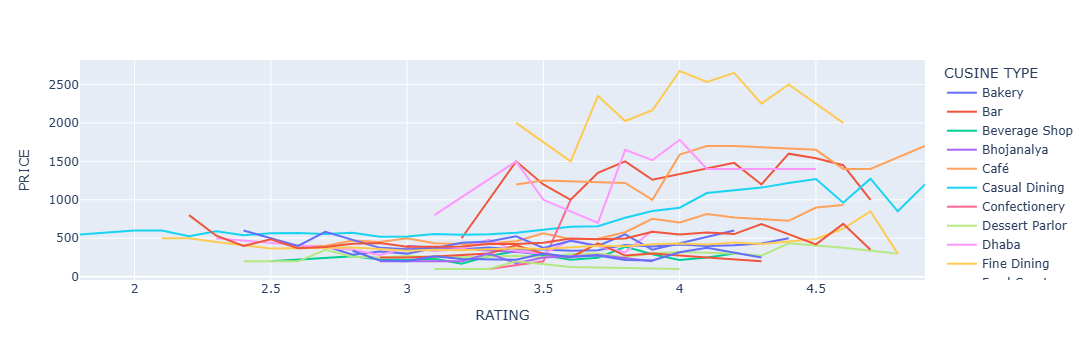

In [96]:
fig = px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')
fig.show()

Q9) Is there a relation between Region and Price?

In [97]:
region_price_df = zomato_df.groupby(['REGION'])['PRICE'].mean().reset_index() 
region_price_df

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,590.049383
4,Bandra,724.945946
...,...,...
75,Vikhroli,480.434783
76,Vile Parle,464.457831
77,Virar,452.027027
78,Wadala,427.500000


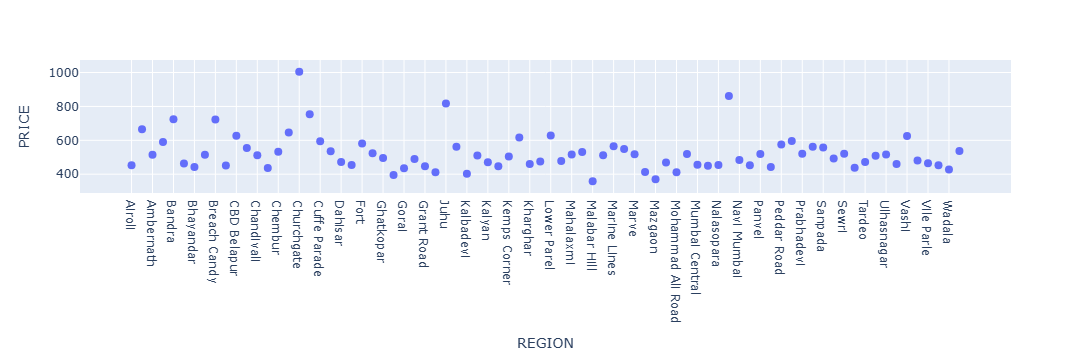

In [98]:
fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8) 
fig.show() 


Q10) Find the list of Affordable Restaurants?

The criteria for Affordable Restaurants would be:
1) Low Price 2) High Rated

First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.

Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000.

In [99]:
max_price = zomato_df['PRICE'].max() 
one_fourth_price = max_price/4 
one_fourth_price 

np.float64(1250.0)

In [100]:
 # Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
 
aff_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']] 
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250] 
aff_rest_df.sort_values(by='PRICE', inplace=True) 
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane,Casual Dining
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none
9598,Ho5 Store,50,Fast Food,Matunga,none
10996,Pandurang Wada Pav And Sandwich Centre,100,Street Food,Goregaon,Quick Bites
3328,Gurukrupa Sandwich And Frankie Corner,100,"Rolls,Fast Food",Sion,none
...,...,...,...,...,...
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar
17,Ustaadi,1200,"Asian,Biryani,Chinese,North Indian,Mughlai,Mid...",Mumbai Central,Casual Dining
7301,SamBar Pub & Kitchen,1250,"Finger Food,South Indian,North Indian",Khar,Pub
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor


In [101]:
 # Finding the highest rated list of restaurants 
 
highrate_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']] 
highrate_rest_df = highrate_rest_df[highrate_rest_df['RATING'] >= 4.5] 
highrate_rest_df.sort_values(by='PRICE', inplace=True) 
highrate_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
807,Moussestruck,200,Desserts,Panvel,none,4.5
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri,none,4.5
...,...,...,...,...,...,...
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
5335,Mia Cucina,2000,Italian,Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra,Casual Dining,4.5


Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!

In [102]:
highrate_aff_df = pd.merge(aff_rest_df, highrate_rest_df, how='inner', on=['NAME', 'REGION']) 
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']] 
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',  
                                'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True) 

In [103]:
 # Affordable Restaurants with low price and high rating  
 
highrate_aff_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200,Desserts,Panvel,none
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
...,...,...,...,...,...
60,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Panvel,Casual Dining
61,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri,Casual Dining
62,The Joker Bistro,1200,"North Indian,Chinese,Continental",CBD Belapur,Casual Dining
63,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining


Q10) Find the list of most Reliable Restaurants?

The criteria for most Reliable Restaurants would be:
1) Low Price 2) High Rated 3) Large No. of Votes

First step will be to find the restaurants with Votes greater than Mean of Votes

In [105]:
mean_votes = zomato_df['VOTES'].mean() 
mean_votes 

np.float64(177.2656679624538)

In [106]:
 # Finding list of restaurants that have Votes greater than and equal to  Mean of Vote 
 
mean_rest_df = zomato_df[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE', 'VOTES']] 
mean_rest_df = mean_rest_df[mean_rest_df['VOTES'] > 177] 
mean_rest_df.sort_values(by='VOTES', inplace=True) 
mean_rest_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,VOTES
99,Appetite - Resto Bar,700,"North Indian,Chinese",Powai,Casual Dining,178
12267,Buddha Bowl,1000,"Asian,Healthy Food",Bandra,none,178
2193,Mumbai Darbar,850,"North Indian,Chinese,Seafood",Lower Parel,Casual Dining,178
11211,Soul Curry,800,"Chinese,North Indian,Malwani,Mughlai,Biryani",Bhandup,Casual Dining,178
2392,Jain Sweet & Farsan House,200,"Street Food,Beverages,Fast Food,Mithai",Goregaon,Quick Bites,178
...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,7327
1251,Joey's Pizza,800,Pizza,Malad,Quick Bites,7350
5337,Chili's American Grill & Bar,1400,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,7377
3751,Prithvi Cafe,700,"Cafe,Fast Food",Juhu,Café,8000


In [108]:
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION']) 
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']] 
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',  
                                'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining
1,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none
2,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
3,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
4,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining
5,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining
6,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Panvel,none
7,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining
8,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining
9,Maezo,1000,Modern Indian,Thane,Casual Dining
